In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

In [5]:
X, y = load_wine(return_X_y=True, as_frame=True)

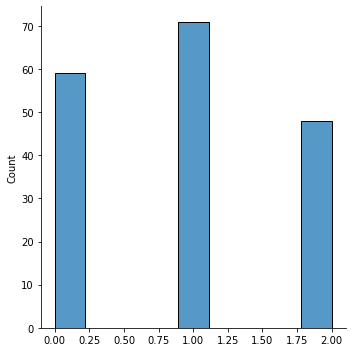

In [4]:
sns.displot(y)


<AxesSubplot:>

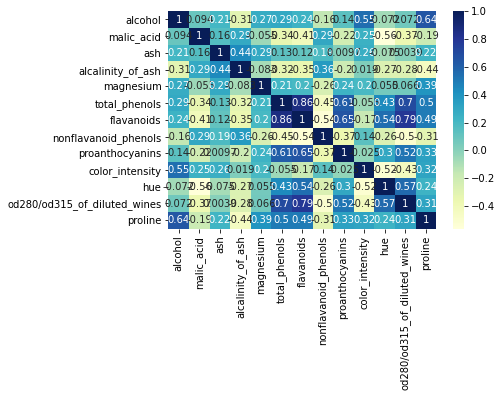

In [10]:
corr = X.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [14]:
from sklearn.decomposition import PCA

pca_wine = PCA(n_components=2)
princpal_wine = pca_wine.fit_transform(X)
principal_wine_Df = pd.DataFrame(princpal_wine, columns=['comp1', 'comp2'])

In [12]:
pca_wine.explained_variance_ratio_

array([0.99809123, 0.00173592])

Procedemos a ahora graficar este dataset pero con la reduccion de variables a 2 dimensiones usando PCA


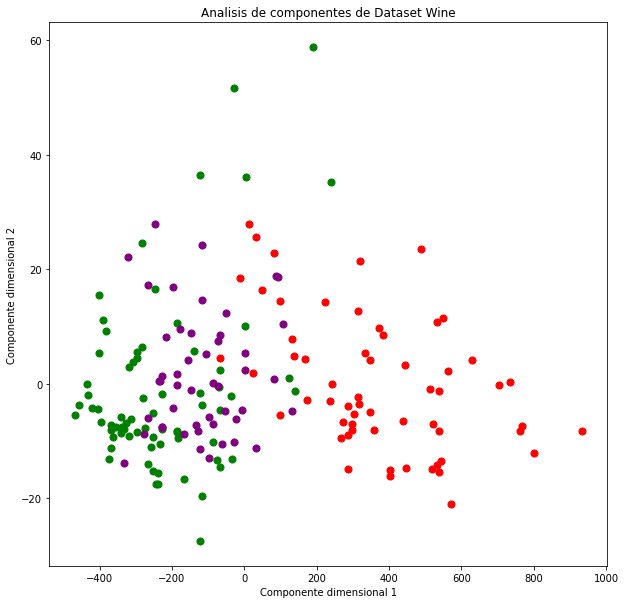

In [15]:
plt.figure(figsize=(10,10))
plt.xlabel("Componente dimensional 1")
plt.ylabel("Componente dimensional 2")
plt.title("Analisis de componentes de Dataset Wine")

targets = [0,1,2]
colors = ['r','g','purple']
for target, color in zip(targets, colors):
    indexTK = (y == target) ##indexTK puede ser valor 0, 1 u 2, esto nos da el el rango de indices por cada uno
    plt.scatter(principal_wine_Df.loc[indexTK, "comp1"],
                principal_wine_Df.loc[indexTK, "comp2"],
                c = color, s = 50)


In [18]:
## se puede revertir la transformacion
# pca_wine.inverse_transform(princpal_wine)


array([[1.35550621e+01, 2.16571712e+00, 2.52733485e+00, ...,
        9.95653303e-01, 2.76112769e+00, 1.06501783e+03],
       [1.34970809e+01, 2.11837339e+00, 2.40094842e+00, ...,
        1.01348581e+00, 2.84410000e+00, 1.05003236e+03],
       [1.37196103e+01, 2.02393409e+00, 2.42186709e+00, ...,
        1.03751020e+00, 2.94333883e+00, 1.18499302e+03],
       ...,
       [1.31699888e+01, 2.31656954e+00, 2.47001032e+00, ...,
        9.58289219e-01, 2.60841233e+00, 8.35001943e+02],
       [1.31781552e+01, 2.31293844e+00, 2.47050001e+00, ...,
        9.59226241e-01, 2.61230434e+00, 8.40001101e+02],
       [1.26901730e+01, 2.46319981e+00, 2.32910058e+00, ...,
        9.25573809e-01, 2.48064889e+00, 5.59986961e+02]])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


In [27]:
from sklearn.linear_model import LogisticRegression
model_regressor = LogisticRegression()
model_regressor.fit(X_train, Y_train)

kfold = KFold(n_splits=10)
cv_result = cross_val_score(model_regressor,X_train,Y_train.values.ravel(), cv = kfold, scoring = "accuracy")

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [24]:
print(cv_result.mean()*100)

96.79487179487178


In [41]:
logistic_prediction = model_regressor.predict(X_test)

In [39]:
model_regressor.score(X_test, Y_test)

0.9444444444444444

In [40]:
from sklearn.neural_network import MLPClassifier
model_mlpc = MLPClassifier(hidden_layer_sizes=(180,), activation='logistic', solver='lbfgs', max_iter=30000, verbose=True).\
    fit(X_train, Y_train)

print(model_mlpc.score(X_train, Y_train))
print(model_mlpc.score(X_test, Y_test))

1.0
0.9629629629629629


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(logistic_prediction, Y_test)


array([[17,  0,  0],
       [ 2, 21,  0],
       [ 0,  1, 13]])

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


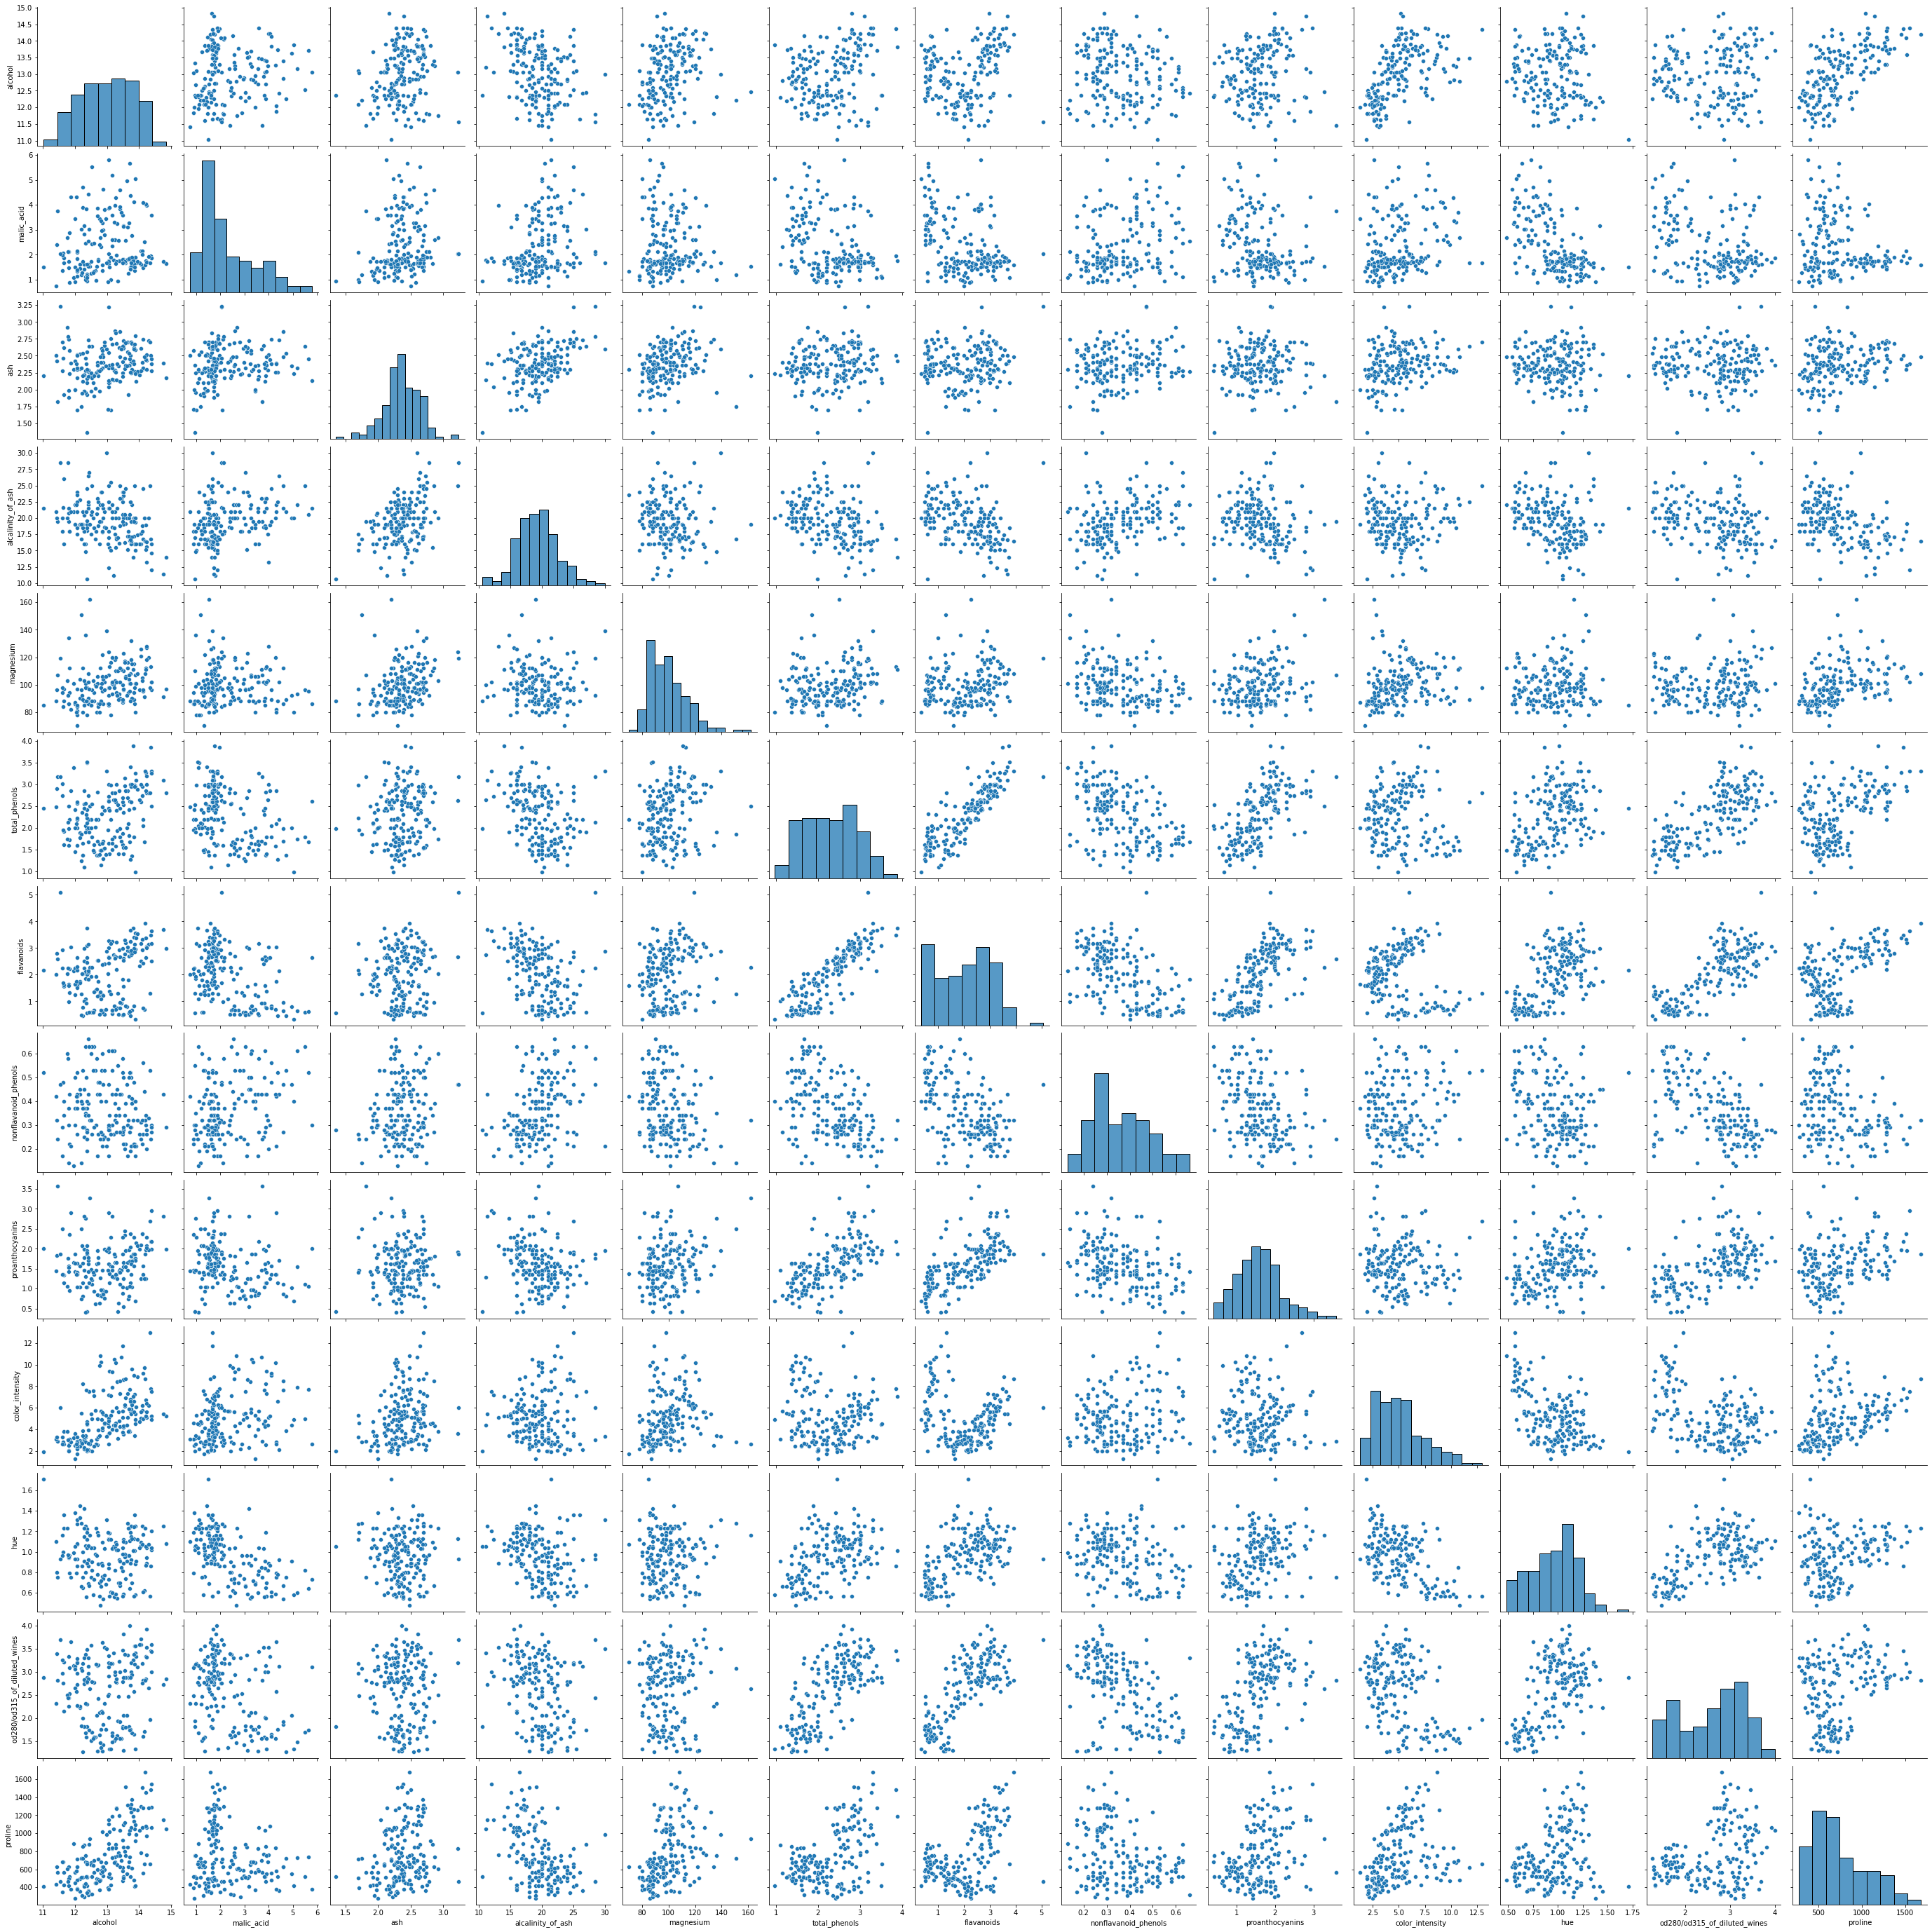

In [47]:
wines = X
wines['type'] = y

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


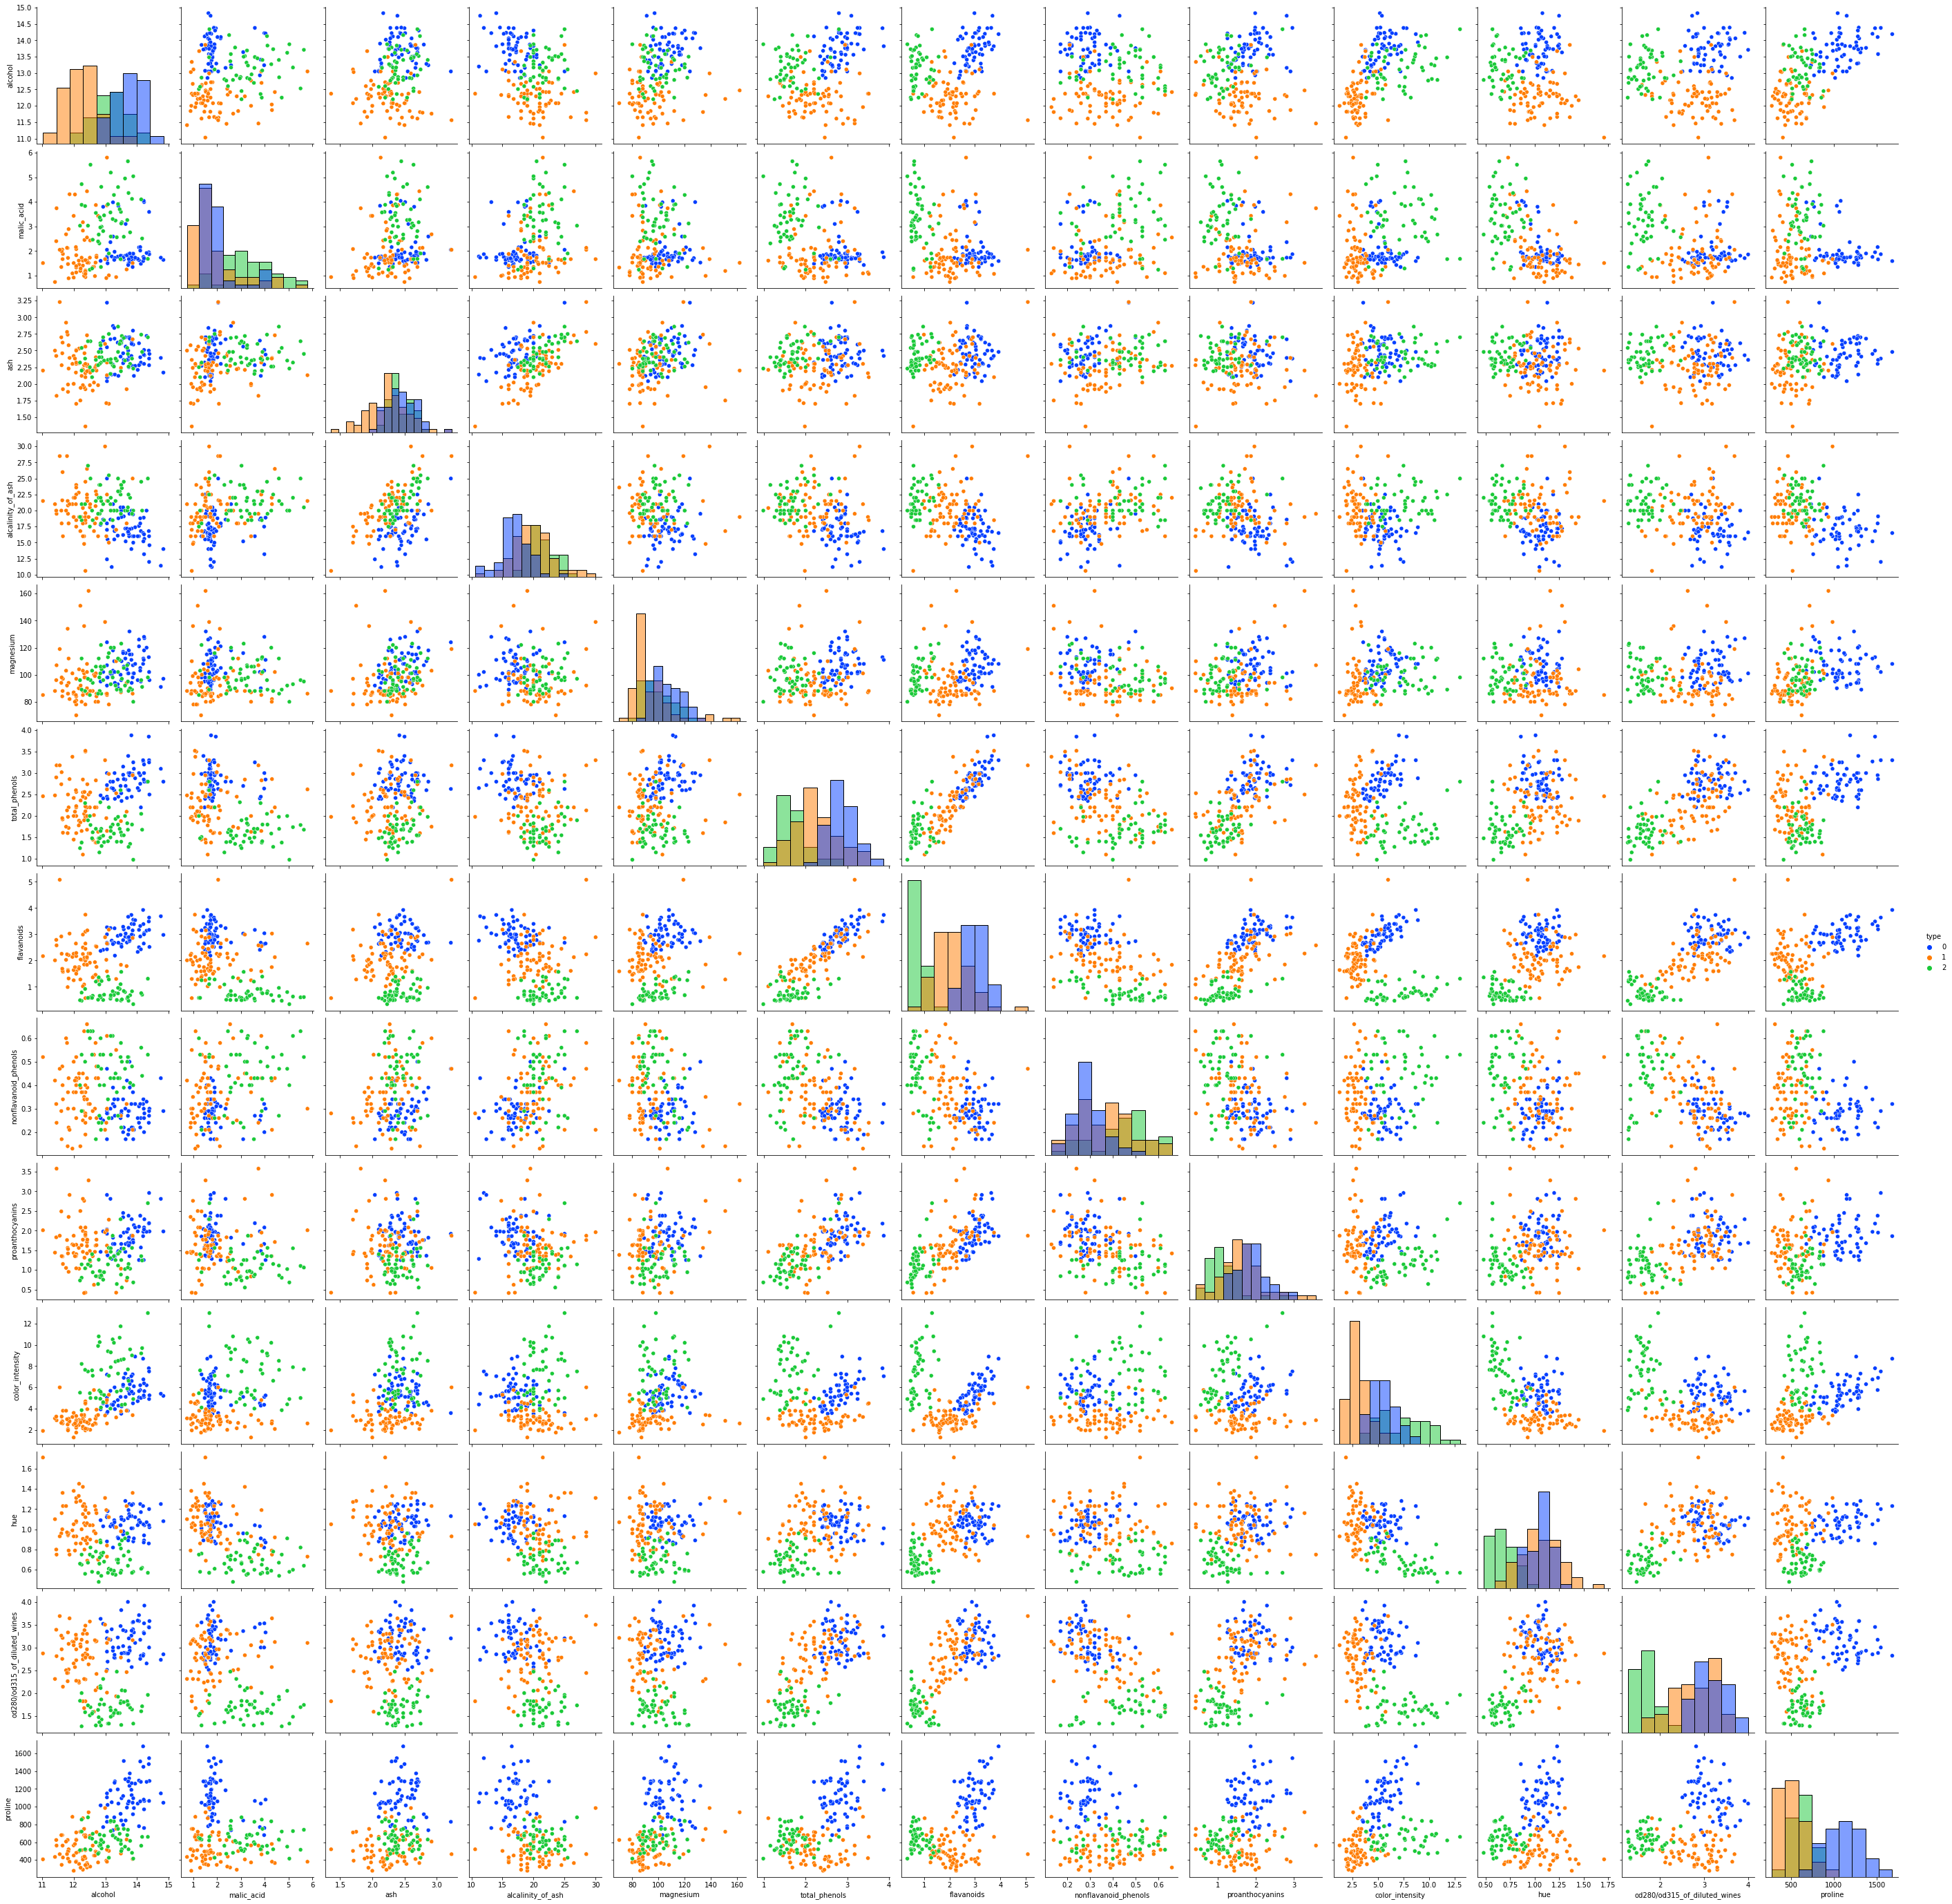

In [54]:
wines

sns.pairplot(data=wines,hue='type', palette=sns.color_palette("bright",n_colors=3), size=3, diag_kind="hist")